### Manual calculation of Coefficient , Intercept, R-squared, Adjusted R-squared using Python

1. Coefficients: The coefficients represent the weights assigned to each feature in the model.
2. Intercept: The intercept is the value where the regression line intersects the y-axis.
3. R-squared: R-squared is a measure of how well the model fits the data, representing the proportion of variance in the dependent variable that is explained by the independent variables.
4. Adjusted R-squared: Adjusted R-squared is a modified version of R-squared that takes into account the number of independent variables in the model.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 1.Manual Calculation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset: age, experience, income
age = np.array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
experience = np.array([2, 5, 8, 10, 15, 18, 20, 25, 30, 35])
income = np.array([50000, 60000, 75000, 80000, 95000, 110000, 115000, 120000, 100000, 85000])

# Step 1: Calculate the number of data points (n)
n = len(age)

# Step 2: Calculate the mean of age, experience, and income
mean_age = np.mean(age)
mean_experience = np.mean(experience)
mean_income = np.mean(income)

# Step 3: Calculate the cross-deviations and sum of squares
SS_xy = np.sum((age - mean_age) * (income - mean_income))
SS_xx = np.sum((age - mean_age) * (age - mean_age))
SS_yy = np.sum((income - mean_income) * (income - mean_income))

# Step 4: Calculate the coefficients (slope and intercept)
slope = SS_xy / SS_xx
intercept = mean_income - slope * mean_age

# Step 5: Calculate the R-squared
R_squared = SS_xy ** 2 / (SS_xx * SS_yy)

# Step 6: Calculate the adjusted R-squared
adjusted_R_squared = 1 - (1 - R_squared) * (n - 1) / (n - 2)

# Step 7: Print the results
print(f"Coefficient (Slope): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {R_squared}")
print(f"Adjusted R-squared: {adjusted_R_squared}")

Coefficient (Slope): 1139.3939393939395
Intercept: 34878.78787878787
R-squared: 0.5475615046167194
Adjusted R-squared: 0.49100669269380925


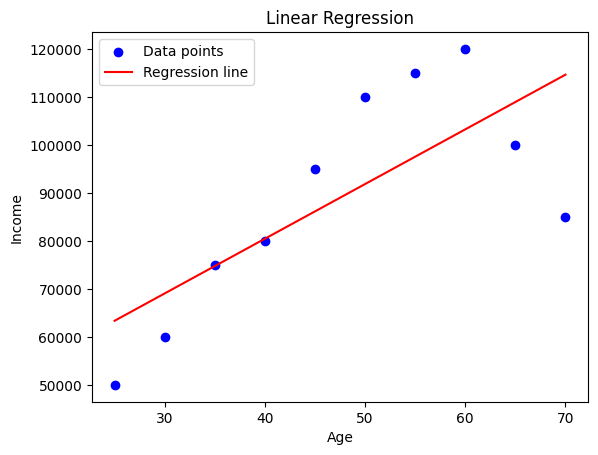

In [12]:
# Step 7: Plot the regression line
plt.scatter(age, income, color='blue', label='Data points')
plt.plot(age, slope * age + intercept, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.title('Linear Regression')
plt.show()

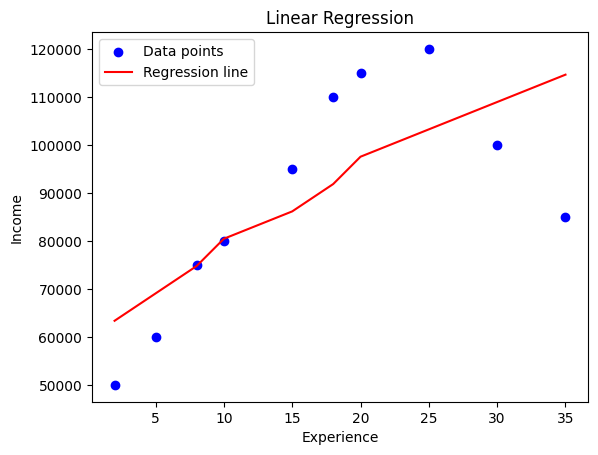

In [13]:
# Step 7: Plot the regression line
plt.scatter(experience, income, color='blue', label='Data points')
plt.plot(experience, slope * age + intercept, color='red', label='Regression line')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.legend()
plt.title('Linear Regression')
plt.show()

### 2. Use Library

In [14]:
# Given NumPy arrays
age = np.array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
experience = np.array([2, 5, 8, 10, 15, 18, 20, 25, 30, 35])
income = np.array([50000, 60000, 75000, 80000, 95000, 110000, 115000, 120000, 100000, 85000])

# Create a DataFrame
data = {'Age': age, 'Experience': experience, 'Income': income}
df = pd.DataFrame(data)
df.head(2)


,Age,Experience,Income
0,25,2,50000
1,30,5,60000


In [15]:
# Multiple linear regression model
X = df[['Age', 'Experience']]
y = df['Income']

model = LinearRegression()
model.fit(X, y)

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

# R-squared
r_squared = model.score(X, y)

# Adjusted R-squared (formula: 1 - (1 - R-squared) * (n - 1) / (n - p - 1))
adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


Coefficients: [  8537.71569433 -10345.11092851]
Intercept: -142743.6318816762
R-squared: 0.8704094852574216
Adjusted R-squared: 0.8333836239023992


### Otimize model

Coefficients: [  8458.3622604  -10234.72406665]
Intercept: -140828.84304946818
R-squared: 0.8703726554176978


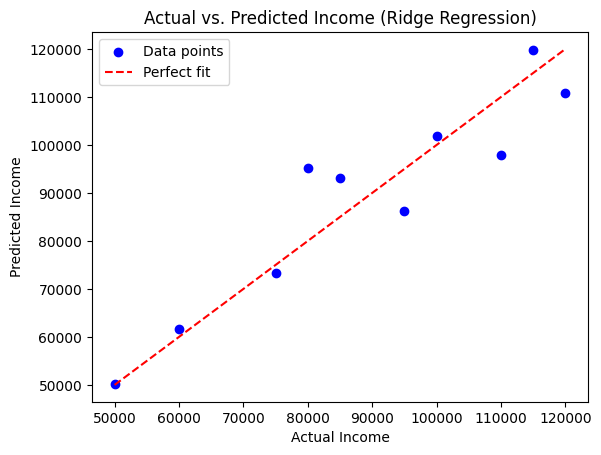

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Combine age and experience as input features
X = np.column_stack((age, experience))
y = income

# Create a Ridge regression model with alpha (regularization strength) of 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model to the data
ridge_model.fit(X, y)

# Get the coefficients and intercept
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

# Make predictions using the model
y_pred = ridge_model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print the results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r2}")

# Plot the actual vs. predicted values
plt.scatter(y, y_pred, c='blue', label='Data points')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect fit')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.legend()
plt.title('Actual vs. Predicted Income (Ridge Regression)')
plt.show()